In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE


from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess



In [2]:
Auber = pd.read_csv('datasets/qualite-de-lair-mesuree-dans-la-station-auber.csv', sep=';')
Auber.head()

,DATE/HEURE,NO,NO2,PM10,PM2.5,CO2,TEMP,HUMI
0,2021-10-18T02:00:00+02:00,ND,ND,ND,ND,ND,ND,ND
1,2021-10-18T01:00:00+02:00,ND,ND,ND,ND,ND,ND,ND
2,2021-10-18T00:00:00+02:00,ND,ND,ND,ND,ND,ND,ND
3,2021-10-17T23:00:00+02:00,ND,ND,ND,ND,ND,ND,ND
4,2021-10-17T22:00:00+02:00,ND,ND,ND,ND,ND,ND,ND


In [90]:
Chatelet = pd.read_csv('datasets/qualite-de-lair-mesuree-dans-la-station-chatelet.csv', sep=';')
Chatelet.head()

,DATE/HEURE,NO,NO2,PM10,CO2,TEMP,HUMI
0,2021-10-18T02:00:00+02:00,4,21,45,471,"20,5","44,5"
1,2021-10-18T01:00:00+02:00,4,21,37,474,"20,3","44,5"
2,2021-10-18T00:00:00+02:00,4,23,47,497,"20,5","44,8"
3,2021-10-17T23:00:00+02:00,4,20,62,518,"19,7","45,6"
4,2021-10-17T22:00:00+02:00,3,20,79,567,"19,1","45,2"


In [120]:
Fr_roosevelt = pd.read_csv('datasets/qualite-de-lair-mesuree-dans-la-station-franklin-d-roosevelt.csv', sep=';')
Fr_roosevelt.head()

,date/heure,NO,NO2,PM10,CO2,TEMP,HUMI
0,2021-10-18T02:00:00+02:00,9,44,34,516,"20,3","40,9"
1,2021-10-18T01:00:00+02:00,7,46,35,512,"20,5","40,6"
2,2021-10-18T00:00:00+02:00,6,44,42,522,"20,7","40,5"
3,2021-10-17T23:00:00+02:00,7,40,48,532,"20,2","40,8"
4,2021-10-17T22:00:00+02:00,5,37,50,551,"19,9","39,6"


In [5]:
Auber.shape

(75978, 8)

In [91]:
Chatelet.shape

(76870, 7)

In [121]:
Fr_roosevelt.shape

(76870, 7)

In [8]:
Auber.isnull().sum()

DATE/HEURE    8736
NO            8736
NO2           8736
PM10          8736
PM2.5         8736
CO2           8736
TEMP          8736
HUMI          8736
dtype: int64

In [92]:
Chatelet.isnull().sum()

DATE/HEURE        0
NO            21329
NO2           13391
PM10          12617
CO2           12304
TEMP          10585
HUMI          10574
dtype: int64

In [122]:
Fr_roosevelt.isnull().sum()

date/heure       0
NO            5179
NO2           4639
PM10          2923
CO2           4785
TEMP          1902
HUMI          1909
dtype: int64

In [11]:
Auber.dropna(inplace=True)
Auber['date'] = Auber['DATE/HEURE'].apply(lambda x : x.partition("T")[0])
Auber['heure'] = Auber['DATE/HEURE'].apply(lambda x : x.partition("T")[2])

Auber.drop('DATE/HEURE' , axis=1,inplace=True)

In [93]:
Chatelet.isnull().sum()

DATE/HEURE        0
NO            21329
NO2           13391
PM10          12617
CO2           12304
TEMP          10585
HUMI          10574
dtype: int64

In [94]:
Chatelet['date'] = Chatelet['DATE/HEURE'].apply(lambda x : x.partition("T")[0])
Chatelet['heure'] = Chatelet['DATE/HEURE'].apply(lambda x : x.partition("T")[2])

Chatelet.drop('DATE/HEURE' , axis=1,inplace=True)
Chatelet.drop('heure' , axis=1,inplace=True)

In [123]:
Fr_roosevelt['date'] = Fr_roosevelt['date/heure'].apply(lambda x : x.partition("T")[0])
Fr_roosevelt['heure'] = Fr_roosevelt['date/heure'].apply(lambda x : x.partition("T")[2])

Fr_roosevelt.drop('date/heure' , axis=1,inplace=True)

In [15]:
Auber['NO'].value_counts()

ND     26955
5        908
4        830
7        768
6        755
       ...  
653        1
627        1
325        1
684        1
955        1
Name: NO, Length: 633, dtype: int64

In [16]:
Auber = Auber[Auber != 'ND' ]

In [17]:
Auber.dropna(inplace = True)

In [18]:
auber_null = Auber.isnull().sum()
auber_null

NO       0
NO2      0
PM10     0
PM2.5    0
CO2      0
TEMP     0
HUMI     0
date     0
heure    0
dtype: int64

In [19]:
Auber.dropna(inplace=True)
Auber['CO2'].replace('ND' , 0 , inplace=True)
Auber['CO2'] = Auber['CO2'].astype(str).astype(int)

Auber['date'] = pd.to_datetime(Auber['date'],format='%Y-%m-%d')
Auber.set_index('date', inplace=True)

In [95]:
Chatelet.dropna(inplace=True)

Chatelet['CO2'].replace('ND' , 0 , inplace=True)
Chatelet['CO2'] = Chatelet['CO2'].astype(str).astype(int)


Chatelet['NO2'].replace('ND' , 0 , inplace=True)
Chatelet['NO2'] = Chatelet['NO2'].astype(str).astype(int)

In [96]:
Chatelet['date'] = pd.to_datetime(Chatelet['date'],format='%Y-%m-%d')
Chatelet.set_index('date', inplace=True)

In [124]:
Fr_roosevelt.dropna(inplace=True)
Fr_roosevelt['CO2'].replace('ND' , 0 , inplace=True)
Fr_roosevelt['CO2'] = Fr_roosevelt['CO2'].astype(str).astype(int)

Fr_roosevelt['date'] = pd.to_datetime(Fr_roosevelt['date'],format='%Y-%m-%d')
Fr_roosevelt.set_index('date', inplace=True)

In [23]:
Auber.head()

,NO,NO2,PM10,PM2.5,CO2,TEMP,HUMI,heure
date,,,,,,,,
2017-12-15,13,34,239,61,407,"16,5","44,7",01:00:00+01:00
2017-12-15,12,36,189,61,448,"16,6","45,5",00:00:00+01:00
2017-12-14,12,33,189,75,441,"16,7","46,2",23:00:00+01:00
2017-12-14,27,40,186,95,466,"16,7","46,2",22:00:00+01:00
2017-12-14,42,53,130,47,538,"16,6","44,9",21:00:00+01:00


In [24]:
# Auber[['time', 'time_zone']] = Auber.heure.str.split("+",expand=True,)

In [25]:
# Auber[['Date', 'temps']] = Auber.heure.str.split(" ",expand=True,)

In [26]:
# Auber.drop(['time', 'heure'], axis=1, inplace=True)
# Auber.drop(['heure'], axis=1, inplace=True)


In [27]:
Auber.head()

,NO,NO2,PM10,PM2.5,CO2,TEMP,HUMI,heure
date,,,,,,,,
2017-12-15,13,34,239,61,407,"16,5","44,7",01:00:00+01:00
2017-12-15,12,36,189,61,448,"16,6","45,5",00:00:00+01:00
2017-12-14,12,33,189,75,441,"16,7","46,2",23:00:00+01:00
2017-12-14,27,40,186,95,466,"16,7","46,2",22:00:00+01:00
2017-12-14,42,53,130,47,538,"16,6","44,9",21:00:00+01:00


In [28]:
# Auber['time'] = pd.to_datetime(Auber['time'], format='%H:%M:%S')

In [29]:
import pytz as tz
# Auber['time_zone'] = pd.to_datetime(Auber['time_zone'], format='%H:%M')


In [30]:
Auber.dtypes

NO       object
NO2      object
PM10     object
PM2.5    object
CO2       int32
TEMP     object
HUMI     object
heure    object
dtype: object

In [31]:
Auber['PM10'].replace('ND' , 0 , inplace=True)
Auber['PM10'].replace('<5' , 3 , inplace=True)
Auber['PM10'].replace('<2' , 1 , inplace=True)
Auber['PM10'] = Auber['PM10'].astype(str).astype(int)

Auber['TEMP'] = Auber['TEMP'].apply(lambda x : x.partition(",")[0])
Auber['TEMP'].replace('ND' , 0 , inplace=True)
Auber['TEMP'].replace('<5' , 3 , inplace=True)
Auber['TEMP'].replace('<2' , 1 , inplace=True)
Auber['TEMP'] = Auber['TEMP'].astype(str).astype(int)


Auber['HUMI'] = Auber['HUMI'].apply(lambda x : x.partition(",")[0])
Auber['HUMI'].replace('ND' , 0 , inplace=True)
Auber['HUMI'].replace('<5' , 3 , inplace=True)
Auber['HUMI'].replace('<2' , 1 , inplace=True)
Auber['HUMI'] = Auber['HUMI'].astype(str).astype(int)


Auber['NO'] = Auber['NO'].apply(lambda x : x.partition(",")[0])
Auber['NO'].replace('ND' , 0 , inplace=True)
Auber['NO'].replace('<5' , 3 , inplace=True)
Auber['NO'].replace('<2' , 1 , inplace=True)
Auber['NO'] = Auber['NO'].astype(str).astype(int)



Auber['NO2'] = Auber['NO2'].apply(lambda x : x.partition(",")[0])
Auber['NO2'].replace('ND' , 0 , inplace=True)
Auber['NO2'].replace('<5' , 3 , inplace=True)
Auber['NO2'].replace('<2' , 1 , inplace=True)
Auber['NO2'] = Auber['NO2'].astype(str).astype(int)

In [32]:
Auber['CO2'].value_counts()

424     216
420     212
425     201
448     199
416     197
       ... 
935       1
998       1
965       1
957       1
1119      1
Name: CO2, Length: 573, dtype: int64

In [33]:
Auber['CO2'].replace('ND' , 0 , inplace=True)
Auber['CO2'] = Auber['CO2'].astype(str).astype(int)

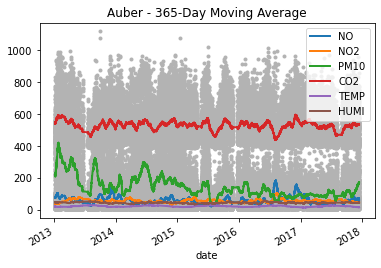

In [34]:
moving_average = Auber.rolling(
    window=365,       # 365-day window
    center=True,      # puts the average at the center of the window
    min_periods=200,  # choose about half the window size
).mean()              # compute the mean (could also do median, std, min, max, ...)

ax = Auber.plot(style=".", color="0.7")

ax.get_legend().remove()
moving_average.plot(
    ax=ax, linewidth=2, title="Auber - 365-Day Moving Average", legend=True,
);

In [145]:
Auber.index.min()

Timestamp('2013-01-04 00:00:00')

In [35]:
Auber[['time', 'time_zone']] = Auber.heure.str.split("+",expand=True,)

In [36]:
# Auber.drop(['heure'], axis=1, inplace=True)

In [37]:
Auber['time'] = pd.to_datetime(Auber['time'], format='%H:%M:%S')
Auber['date'] = Auber.index

In [38]:
Auber.dtypes

NO                    int32
NO2                   int32
PM10                  int32
PM2.5                object
CO2                   int32
TEMP                  int32
HUMI                  int32
heure                object
time         datetime64[ns]
time_zone            object
date         datetime64[ns]
dtype: object

In [39]:
Auber[['Year', 'Month','date1']] = Auber.date.astype('str').str.split("-",expand=True,)

In [40]:
Auber['Year'] =Auber.Year.astype('int')
Auber['Month'] =Auber.Year.astype('int')
Auber['date1'] =Auber.Year.astype('int')

In [41]:
Auber

,NO,NO2,PM10,PM2.5,CO2,TEMP,HUMI,heure,time,time_zone,date,Year,Month,date1
date,,,,,,,,,,,,,,
2017-12-15,13,34,239,61,407,16,44,01:00:00+01:00,1900-01-01 01:00:00,01:00,2017-12-15,2017,2017,2017
2017-12-15,12,36,189,61,448,16,45,00:00:00+01:00,1900-01-01 00:00:00,01:00,2017-12-15,2017,2017,2017
2017-12-14,12,33,189,75,441,16,46,23:00:00+01:00,1900-01-01 23:00:00,01:00,2017-12-14,2017,2017,2017
2017-12-14,27,40,186,95,466,16,46,22:00:00+01:00,1900-01-01 22:00:00,01:00,2017-12-14,2017,2017,2017
2017-12-14,42,53,130,47,538,16,44,21:00:00+01:00,1900-01-01 21:00:00,01:00,2017-12-14,2017,2017,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-04,92,42,584,244,646,21,50,21:00:00+01:00,1900-01-01 21:00:00,01:00,2013-01-04,2013,2013,2013
2013-01-04,102,41,692,286,757,22,50,20:00:00+01:00,1900-01-01 20:00:00,01:00,2013-01-04,2013,2013,2013
2013-01-04,126,48,392,141,830,22,50,19:00:00+01:00,1900-01-01 19:00:00,01:00,2013-01-04,2013,2013,2013


In [42]:
Auber['Lag_CO2'] = Auber['CO2'].shift(1)
Auber.fillna(0, inplace=True)

X2 = Auber.loc[:,['Lag_CO2','NO2','NO','TEMP','HUMI','PM10','Year']]
Y2 = Auber['CO2']

X0 = Auber.loc[:,['Lag_CO2','NO2','NO','TEMP','HUMI','PM10','Year']]
Y0 = Auber['CO2']

X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size = 0.25, random_state = 0)
X_train0, X_test0, y_train0, y_test0 = train_test_split(X0, Y0, test_size = 0.25, random_state = 0)

In [43]:
#Standardize Data
from sklearn.preprocessing import RobustScaler
cols = X_train.columns

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])

X_test = pd.DataFrame(X_test, columns=[cols])

In [44]:
Auber.head()

,NO,NO2,PM10,PM2.5,CO2,TEMP,HUMI,heure,time,time_zone,date,Year,Month,date1,Lag_CO2
date,,,,,,,,,,,,,,,
2017-12-15,13,34,239,61,407,16,44,01:00:00+01:00,1900-01-01 01:00:00,01:00,2017-12-15,2017,2017,2017,0.0
2017-12-15,12,36,189,61,448,16,45,00:00:00+01:00,1900-01-01 00:00:00,01:00,2017-12-15,2017,2017,2017,407.0
2017-12-14,12,33,189,75,441,16,46,23:00:00+01:00,1900-01-01 23:00:00,01:00,2017-12-14,2017,2017,2017,448.0
2017-12-14,27,40,186,95,466,16,46,22:00:00+01:00,1900-01-01 22:00:00,01:00,2017-12-14,2017,2017,2017,441.0
2017-12-14,42,53,130,47,538,16,44,21:00:00+01:00,1900-01-01 21:00:00,01:00,2017-12-14,2017,2017,2017,466.0


In [45]:
Auber.isnull().sum()

NO           0
NO2          0
PM10         0
PM2.5        0
CO2          0
TEMP         0
HUMI         0
heure        0
time         0
time_zone    0
date         0
Year         0
Month        0
date1        0
Lag_CO2      0
dtype: int64

C:\Users\Ihsaan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of CO2 Level')

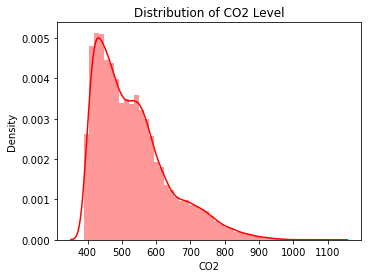

In [46]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(Auber['CO2'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of CO2 Level')

In [47]:

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [48]:
model.score(X_train, y_train)

0.7567198023796188

In [49]:
y_pred1 = model.predict(X_test)

In [50]:
mse_sk = mean_squared_error(y_pred1, y_test)
mse_sk

2668.227502489496

In [51]:
# R_square
R_square_sk = model.score(X_test,y_test)
R_square_sk

0.7618339979984148

In [52]:
# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=folds)
scores   

array([0.7626718 , 0.75818195, 0.75114558, 0.74878293, 0.76112153])

In [53]:
# can tune other metrics, such as MSE
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores

array([-2818.1773307 , -2641.14669079, -2592.49680514, -2817.57462727,
       -2729.13364821])

In [54]:

# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 14))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             return_train_score=True, scoring='r2', verbose=1)

In [55]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.016954,0.002186,0.002393,4.890257e-04,1,{'n_features_to_select': 1},0.725834,0.714470,0.713111,0.709470,...,0.715109,0.005607,13,0.712557,0.715363,0.715710,0.716644,0.715845,0.715224,0.001398
1,0.014358,0.000492,0.001994,4.422006e-07,2,{'n_features_to_select': 2},0.747349,0.743409,0.737989,0.736085,...,0.742139,0.004393,12,0.741039,0.742023,0.743383,0.743888,0.741408,0.742348,0.001109
2,0.016157,0.001829,0.002626,5.199900e-04,3,{'n_features_to_select': 3},0.752522,0.747764,0.742248,0.740631,...,0.746840,0.004699,11,0.745611,0.746805,0.748181,0.748616,0.745977,0.747038,0.001184
3,0.015160,0.001466,0.002221,7.779801e-04,4,{'n_features_to_select': 4},0.759837,0.755094,0.748465,0.748318,...,0.753960,0.004793,10,0.752733,0.753925,0.755574,0.755641,0.753167,0.754208,0.001205
4,0.017198,0.001738,0.003391,7.987269e-04,5,{'n_features_to_select': 5},0.762198,0.757963,0.750743,0.748811,...,0.756033,0.005317,9,0.754800,0.755846,0.757664,0.758148,0.755232,0.756338,0.001332
5,0.014765,0.002692,0.003590,1.016429e-03,6,{'n_features_to_select': 6},0.762189,0.757765,0.750883,0.748549,...,0.756046,0.005414,8,0.754907,0.756153,0.757895,0.758308,0.755396,0.756532,0.001348
6,0.008778,0.000977,0.002990,6.316567e-04,7,{'n_features_to_select': 7},0.762672,0.758182,0.751146,0.748783,...,0.756381,0.005485,1,0.755185,0.756279,0.758069,0.758649,0.755564,0.756749,0.001373
7,0.007980,0.001410,0.002392,4.883249e-04,8,{'n_features_to_select': 8},0.762672,0.758182,0.751146,0.748783,...,0.756381,0.005485,1,0.755185,0.756279,0.758069,0.758649,0.755564,0.756749,0.001373
8,0.007180,0.000747,0.002392,4.883052e-04,9,{'n_features_to_select': 9},0.762672,0.758182,0.751146,0.748783,...,0.756381,0.005485,1,0.755185,0.756279,0.758069,0.758649,0.755564,0.756749,0.001373
9,0.006982,0.000892,0.002393,4.887920e-04,10,{'n_features_to_select': 10},0.762672,0.758182,0.751146,0.748783,...,0.756381,0.005485,1,0.755185,0.756279,0.758069,0.758649,0.755564,0.756749,0.001373


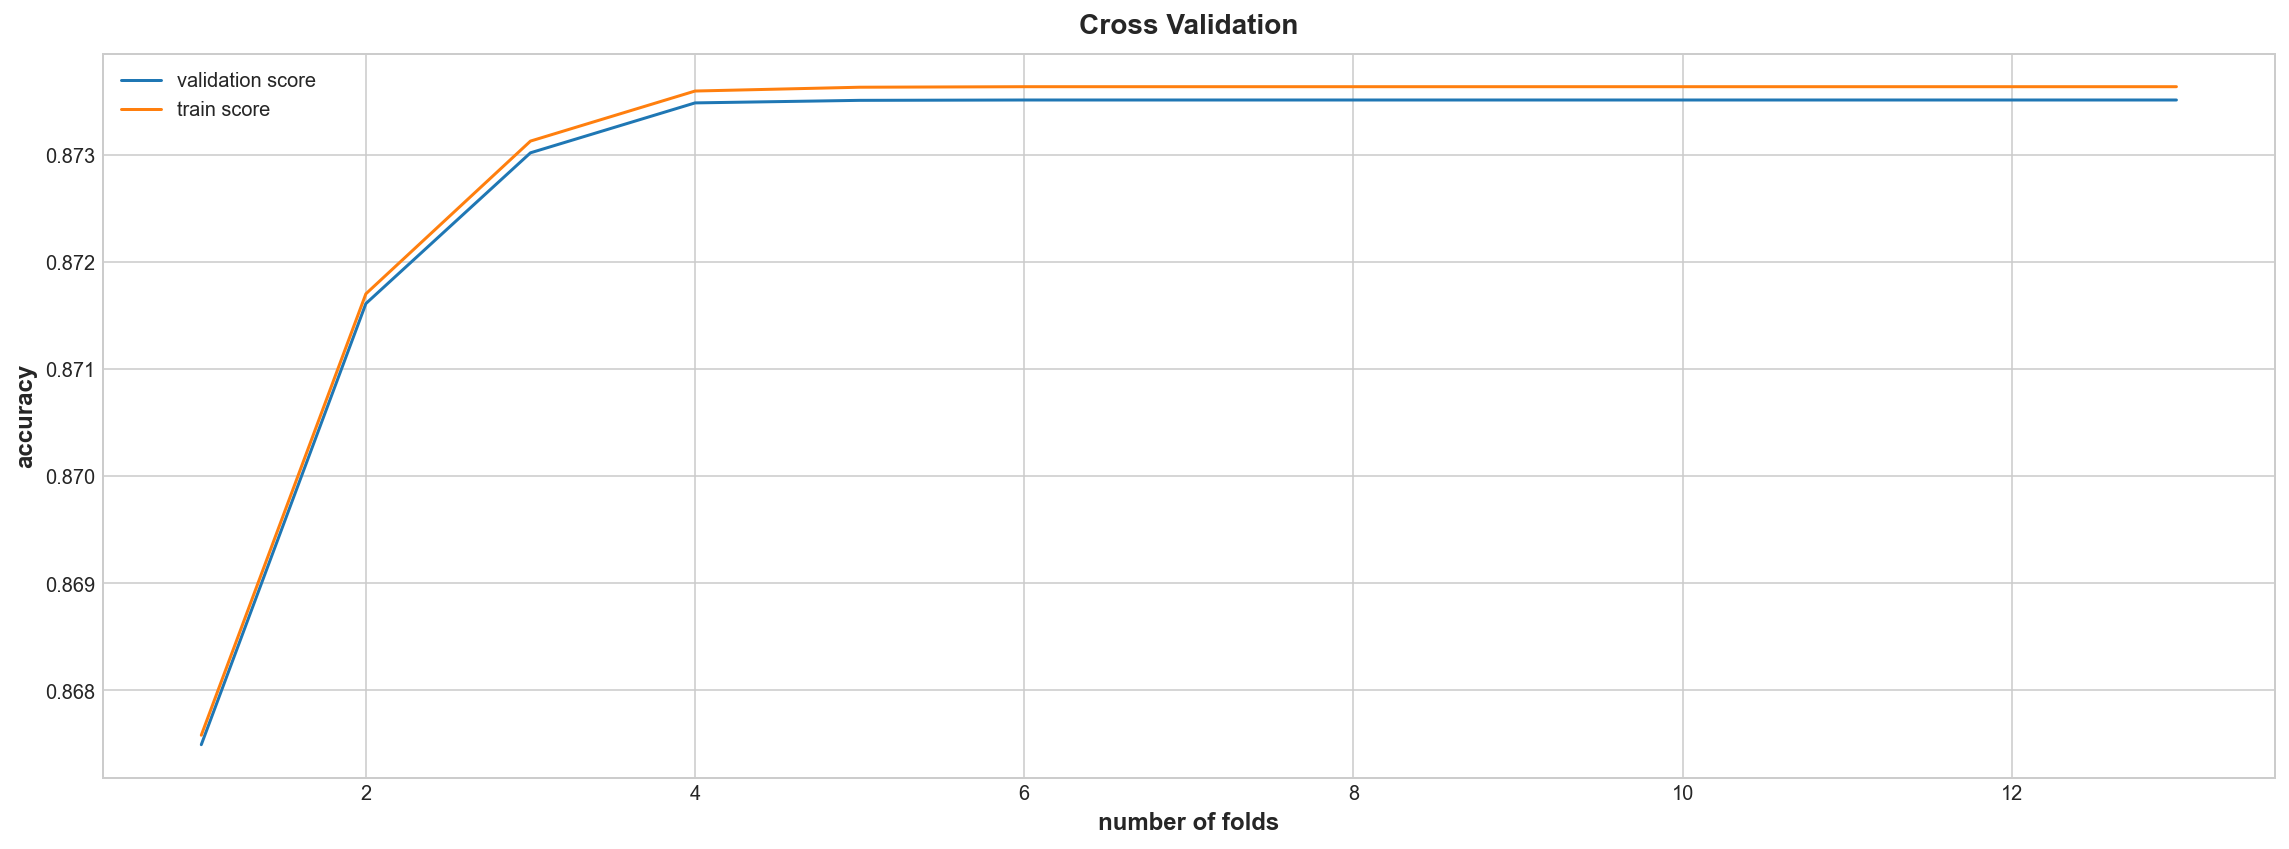

In [153]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of folds')
plt.ylabel('accuracy')
plt.title("Cross Validation")
plt.legend(['validation score', 'train score'], loc='upper left')

C:\Users\Ihsaan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ihsaan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


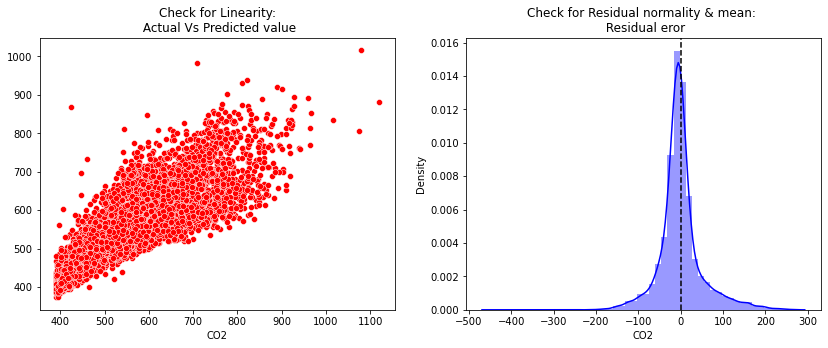

In [57]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred1,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred1),ax=ax,color='b')
ax.axvline((y_test - y_pred1).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

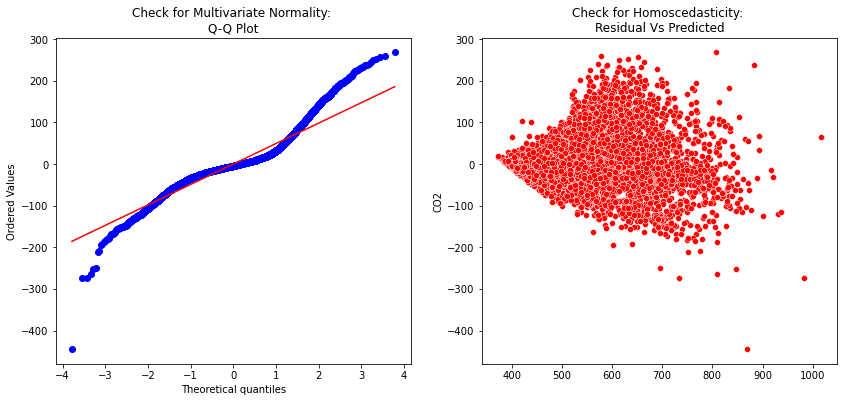

In [58]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred1),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred1), x= y_pred1, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [59]:

y_pred = pd.Series(model.predict(X_train), index=X_train.index)
y_pred



0        408.179810
1        555.192662
2        562.003608
3        506.358181
4        529.324791
            ...    
26928    501.564109
26929    533.963510
26930    417.787646
26931    546.624982
26932    636.150383
Length: 26933, dtype: float64

In [60]:
mse = mean_squared_error(y_test, y_pred1)
mse


2668.227502489496

In [61]:
len(y_train)

26933

In [62]:


# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

Text(0, 0.5, 'CO2 Level')

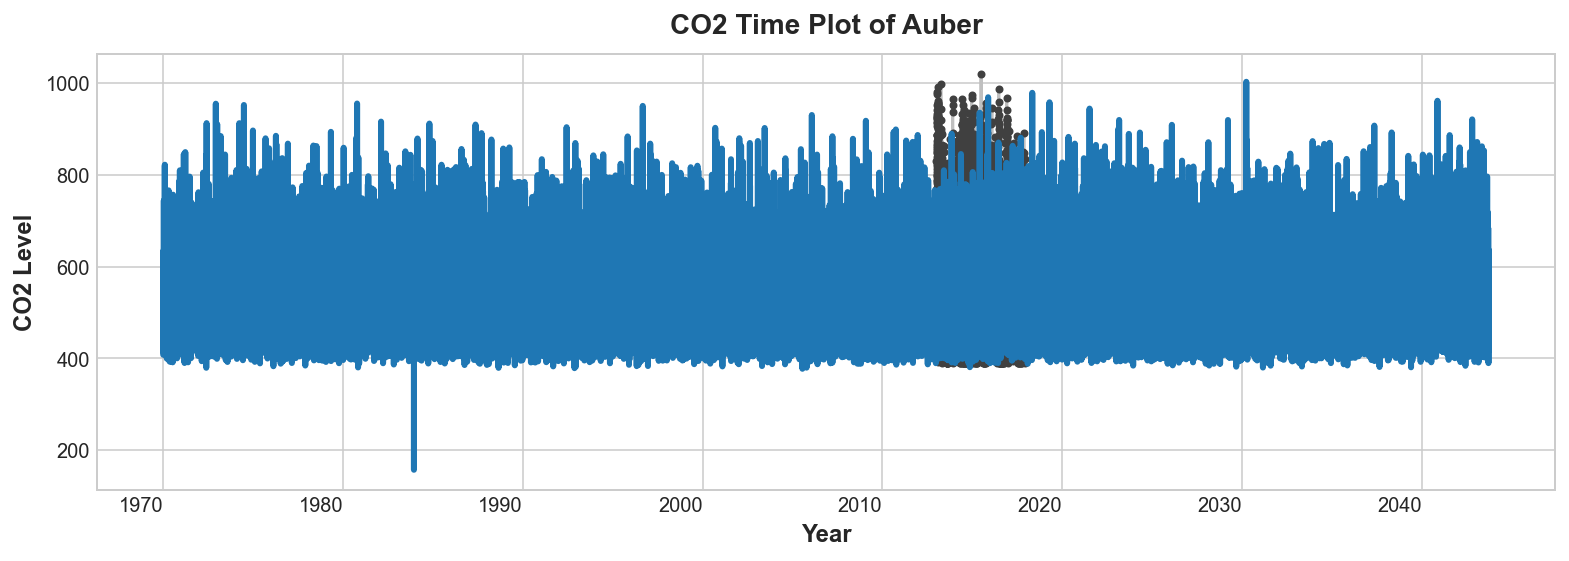

In [63]:
ax = y_train.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('CO2 Time Plot of Auber');
ax.set_xlabel('Year')
ax.set_ylabel('CO2 Level')

In [64]:
X_train.head()

,Lag_CO2,NO2,NO,TEMP,HUMI,PM10,Year
0,-0.817518,-0.652174,-0.600000,0.666667,-0.2,-0.788991,0.5
1,0.284672,-0.173913,0.183333,0.333333,-0.7,1.357798,-1.0
2,0.065693,-1.086957,0.000000,-0.833333,0.1,3.220183,-1.0
3,-0.218978,1.217391,1.050000,0.833333,-0.1,0.944954,-1.0
4,0.138686,0.695652,0.916667,0.000000,-0.6,-0.330275,0.5


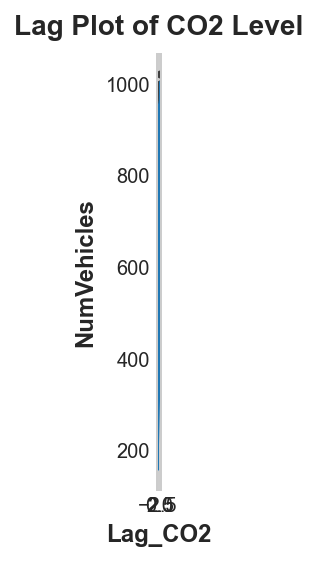

In [65]:
fig, ax = plt.subplots()
ax.plot(X_train['Lag_CO2'], y_train, '.', color='0.25')
ax.plot(X_train['Lag_CO2'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('NumVehicles')
ax.set_xlabel('Lag_CO2')
ax.set_title('Lag Plot of CO2 Level');

In [66]:
def fourier_features(index, freq, order):
    time = np.arange(len(index), dtype=np.float32)
    k = 2 * np.pi * (1 / freq) * time
    features = {}
    for i in range(1, order + 1):
        features.update({
            f"sin_{freq}_{i}": np.sin(i * k),
            f"cos_{freq}_{i}": np.cos(i * k),
        })
    return pd.DataFrame(features, index=index)

In [148]:
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax


def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("1Y") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Frequency")
    ax.set_title("Periodogram")
    return ax

<ipython-input-68-b5f035d9b122>:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  X["week"] = X.index.week  # the seasonal period (period)


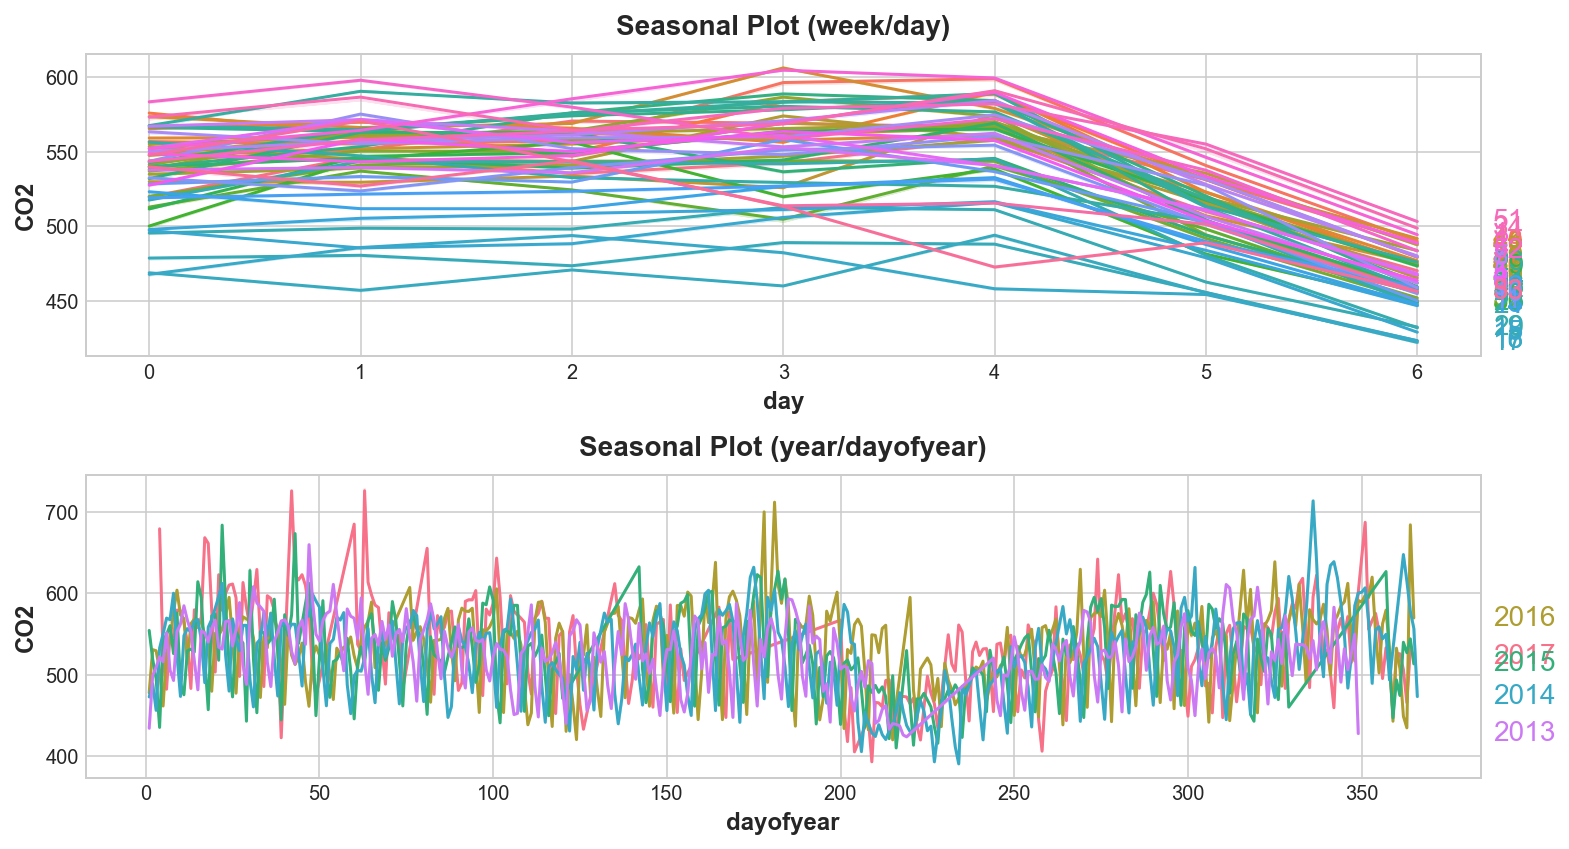

In [68]:
X = Auber.copy()

# days within a week
X["day"] = X.index.dayofweek  # the x-axis (freq)
X["week"] = X.index.week  # the seasonal period (period)

# days within a year
X["dayofyear"] = X.index.dayofyear
X["year"] = X.index.year
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(11, 6))
seasonal_plot(X, y="CO2", period="week", freq="day", ax=ax0)
seasonal_plot(X, y="CO2", period="year", freq="dayofyear", ax=ax1);

<ipython-input-149-4911c6886077>:1: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version
  plot_periodogram(Auber.CO2);


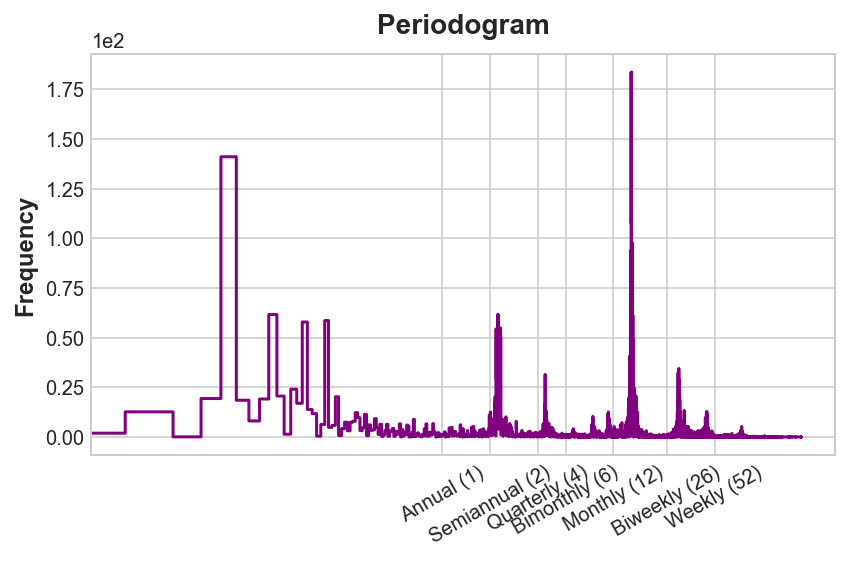

In [149]:
plot_periodogram(Auber.CO2);

In [70]:

fourier = CalendarFourier(freq="A", order=10)  # 10 sin/cos pairs for "A"nnual seasonality
# Auber.index = pd.to_datetime(Auber.index)
dp = DeterministicProcess(
    index=Auber.index,  # dates from the training data
    constant=True,  # the intercept
    order=1,        # quadratic trend
    drop=True, 
    additional_terms=[fourier],# drop terms to avoid collinearity 
)

X = dp.in_sample()  # create features for dates in tunnel.index


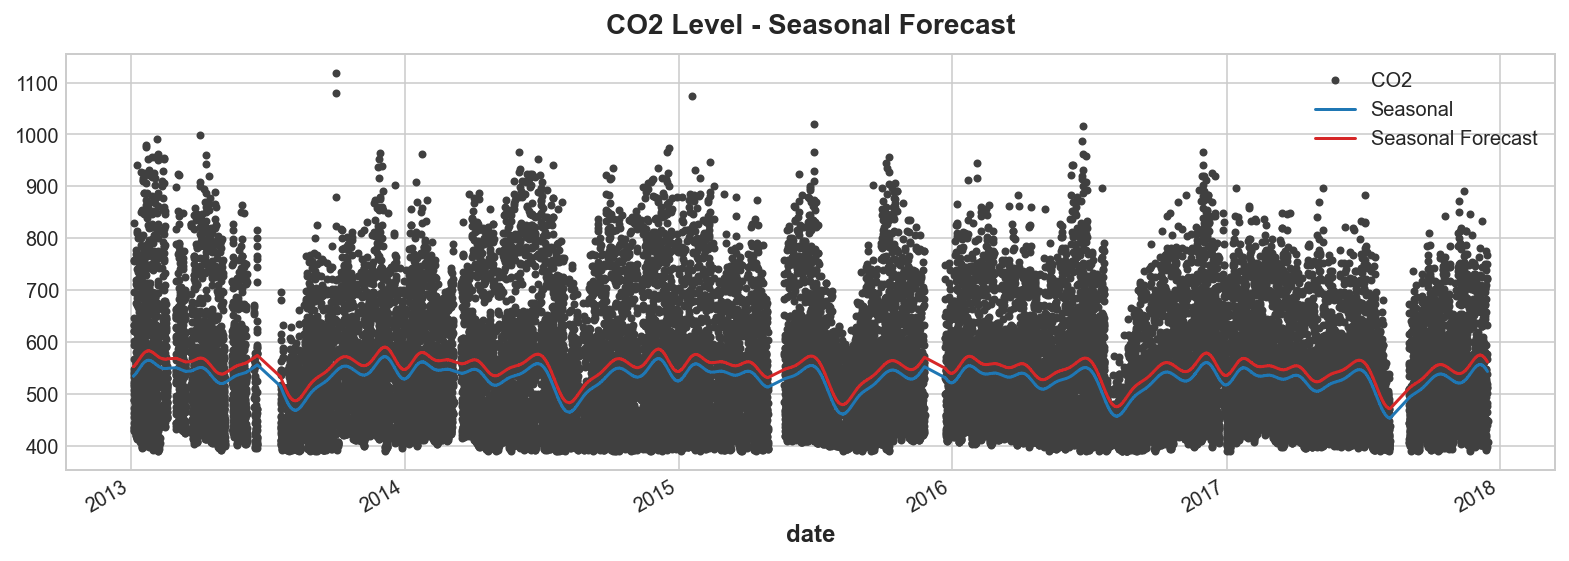

In [71]:
y = Auber["CO2"]
model = LinearRegression(fit_intercept=False)
_ = model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=y.index)
X_fore = dp.out_of_sample(steps =35911, forecast_index = Auber.index)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot(color='0.25', style='.', title="CO2 Level - Seasonal Forecast")
ax = y_pred.plot(ax=ax, label="Seasonal")
ax = y_fore.plot(ax=ax, label="Seasonal Forecast", color='C3')
_ = ax.legend()

C:\Users\Ihsaan\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  plot_obj.generate()
C:\Users\Ihsaan\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  plot_obj.generate()
C:\Users\Ihsaan\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  plot_obj.generate()


<Figure size 640x1280 with 0 Axes>

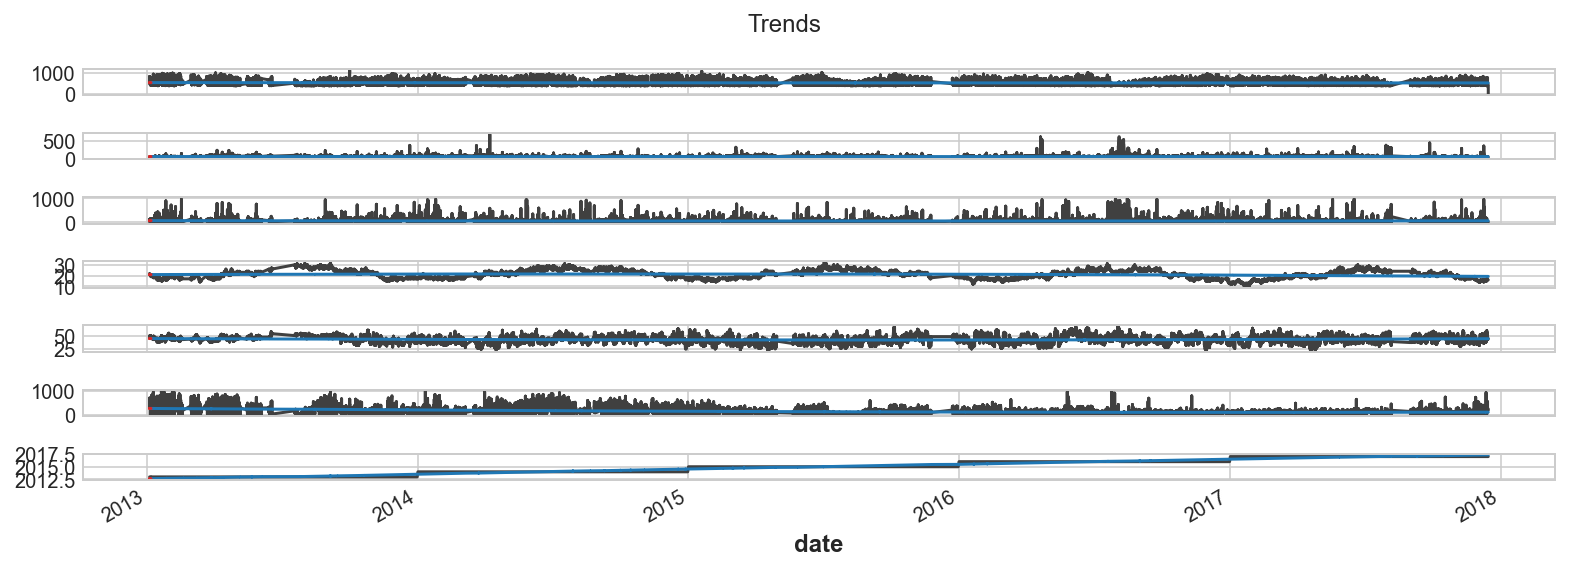

In [72]:
from matplotlib.pyplot import figure
# Create trend features
dp1 = DeterministicProcess(
    index=Auber.index,  # dates from the training data
    constant=True,  # the intercept
    order=2,        # quadratic trend
    drop=True,      # drop terms to avoid collinearity
)
X = dp1.in_sample()  # features for the training data

# Test on the years 2016-2019. It will be easier for us later if we
# split the date index instead of the dataframe directly.
idx_train, idx_test = train_test_split(
    Auber.index, test_size=12 * 4, shuffle=False,
)
X_train, X_test = X.loc[idx_train, :], X.loc[idx_test, :]
y_train, y_test = X2.loc[idx_train], X2.loc[idx_test]

# Fit trend model
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

# Make predictions
y_fit = pd.DataFrame(
    model.predict(X_train),
    index=y_train.index,
    columns=y_train.columns,
)
y_pred = pd.DataFrame(
    model.predict(X_test),
    index=y_test.index,
    columns=y_test.columns,
)

# Plot
figure(figsize=(8, 16), dpi=80)
axs = y_train.plot(color='0.25', subplots=True, sharex=True)
axs = y_test.plot(color='0.25', subplots=True, sharex=True, ax=axs)
axs = y_fit.plot(color='C0', subplots=True, sharex=True, ax=axs)
axs = y_pred.plot(color='C3', subplots=True, sharex=True, ax=axs)
for ax in axs: ax.legend([])
_ = plt.suptitle("Trends")

In [73]:
Auber['Lag_NO2'] = Auber['NO2'].shift(1)
Auber.fillna(0, inplace=True)

X3 = Auber.loc[:,['Lag_NO2','CO2','NO','TEMP','HUMI','PM10','Year']]
Y3 = Auber['NO2']

X_trainNO2, X_testNO2, y_trainNO2, y_testNO2 = train_test_split(X3, Y3, test_size = 0.25, random_state = 0)

In [74]:
#Standardize Data
cols = X_trainNO2.columns

scaler = StandardScaler()

X_trainNO2 = scaler.fit_transform(X_trainNO2)

X_testNO2 = scaler.transform(X_testNO2)

X_trainNO2 = pd.DataFrame(X_trainNO2, columns=[cols])

X_testNO2 = pd.DataFrame(X_testNO2, columns=[cols])

In [75]:

model = LinearRegression()

model.fit(X_trainNO2, y_trainNO2)
model.score(X_trainNO2, y_trainNO2)

0.6451415777185607

In [76]:
y_predNO2 = pd.Series(model.predict(X_trainNO2), index=X_trainNO2.index)
y_predNO2

0        40.008332
1        56.605470
2        28.423670
3        77.296500
4        69.815841
           ...    
26928    63.211953
26929    52.415974
26930    44.337183
26931    48.147580
26932    59.952801
Length: 26933, dtype: float64

Text(0, 0.5, 'NO2 Level')

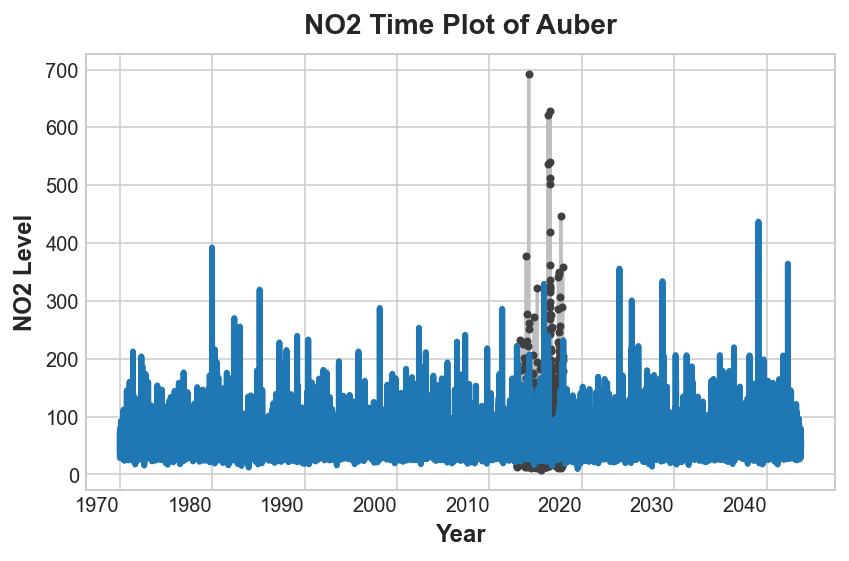

In [151]:
ax = y_trainNO2.plot(**plot_params)
ax = y_predNO2.plot(ax=ax, linewidth=3)
ax.set_title('NO2 Time Plot of Auber');
ax.set_xlabel('Year')
ax.set_ylabel('NO2 Level')

<ipython-input-152-4cca36dbe052>:1: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version
  plot_periodogram(Auber.NO2);


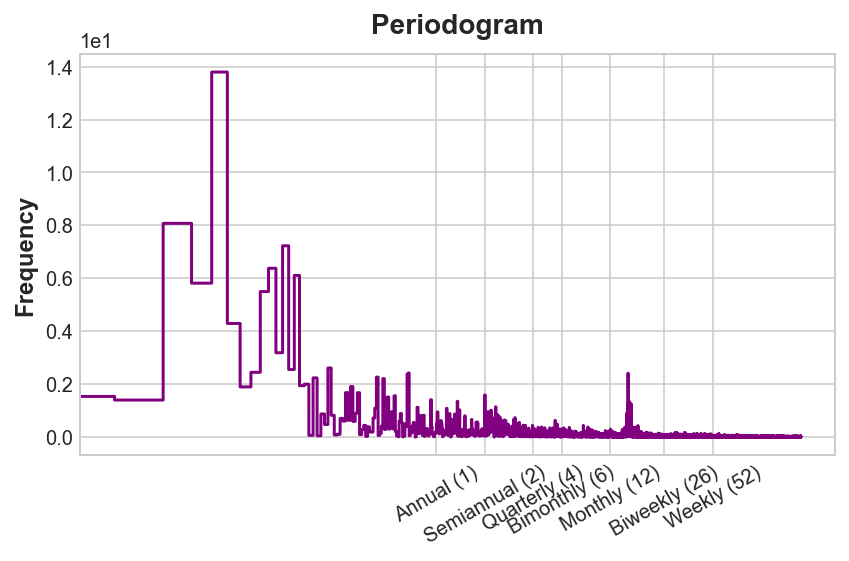

In [152]:
plot_periodogram(Auber.NO2);

In [79]:
Auber['Lag_NO'] = Auber['NO'].shift(1)
Auber.fillna(0, inplace=True)

X4 = Auber.loc[:,['Lag_NO','CO2','NO2','TEMP','HUMI','PM10','Year']]
Y4 = Auber['NO']

X_trainNO, X_testNO, y_trainNO, y_testNO = train_test_split(X4, Y4, test_size = 0.25, random_state = 0)

In [80]:
cols = X_trainNO.columns

scaler = StandardScaler()

X_trainNO = scaler.fit_transform(X_trainNO)

X_testNO = scaler.transform(X_testNO)

X_trainNO = pd.DataFrame(X_trainNO, columns=[cols])

X_testNO = pd.DataFrame(X_testNO, columns=[cols])

In [81]:

model = LinearRegression()

model.fit(X_trainNO, y_trainNO)
model.score(X_trainNO, y_trainNO)

0.5028378434136085

In [82]:
y_predNO = pd.Series(model.predict(X_trainNO), index=X_trainNO.index)
y_predNO

0        -13.516756
1         35.250332
2         49.210723
3        105.453991
4         72.288755
            ...    
26928     57.824552
26929     77.624168
26930     29.178405
26931     79.835898
26932     45.325272
Length: 26933, dtype: float64

Text(0, 0.5, 'NO Level')

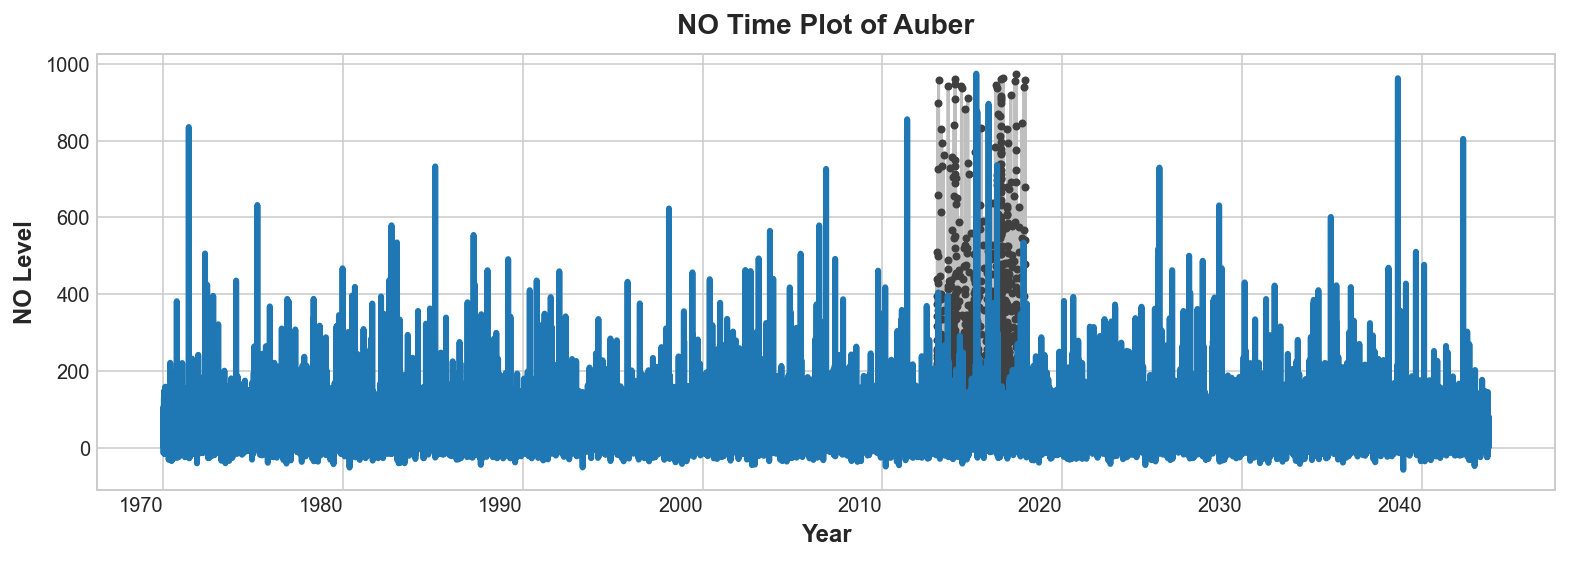

In [83]:
ax = y_trainNO.plot(**plot_params)
ax = y_predNO.plot(ax=ax, linewidth=3)
ax.set_title('NO Time Plot of Auber');
ax.set_xlabel('Year')
ax.set_ylabel('NO Level')

<ipython-input-84-c9fa807d612c>:1: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version
  plot_periodogram(Auber.NO);


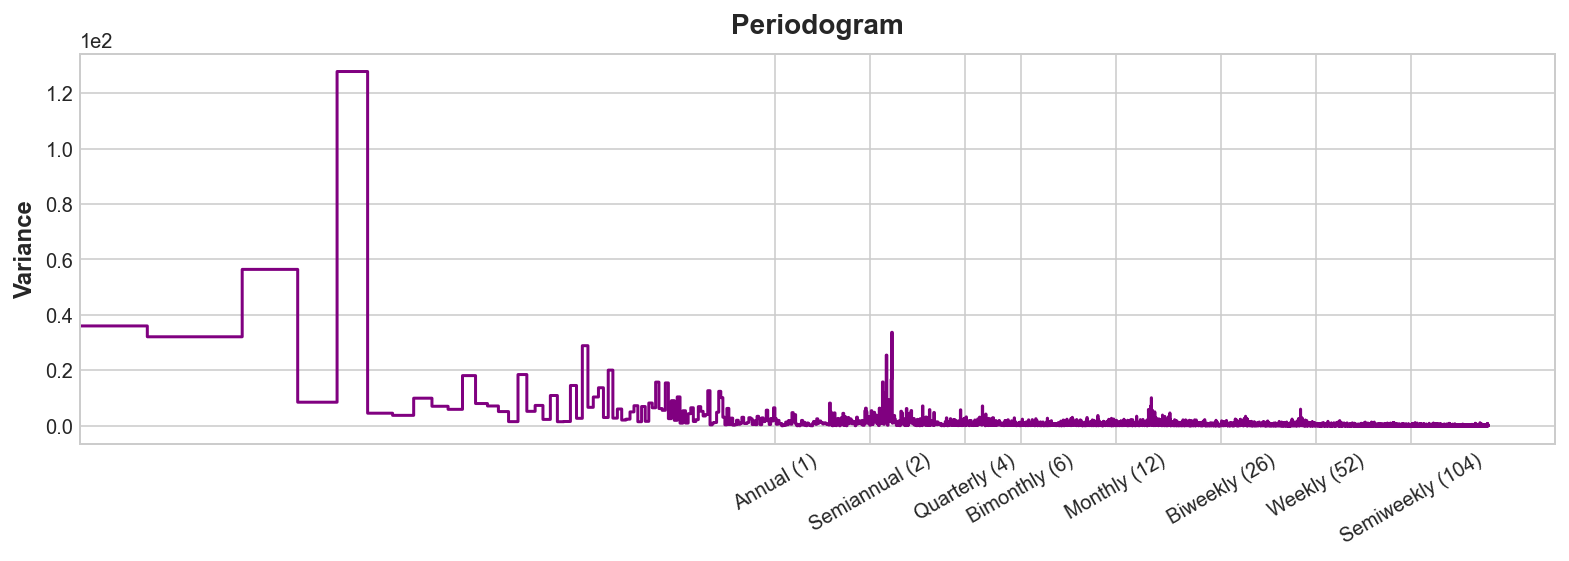

In [84]:
plot_periodogram(Auber.NO);

Chatlet Dataset

In [97]:
Chatelet.head()

,NO,NO2,PM10,CO2,TEMP,HUMI
date,,,,,,
2021-10-18,4,21,45,471,"20,5","44,5"
2021-10-18,4,21,37,474,"20,3","44,5"
2021-10-18,4,23,47,497,"20,5","44,8"
2021-10-17,4,20,62,518,"19,7","45,6"
2021-10-17,3,20,79,567,"19,1","45,2"


In [98]:
Chatelet.isnull().sum()

NO      0
NO2     0
PM10    0
CO2     0
TEMP    0
HUMI    0
dtype: int64

In [99]:
Chatelet.dtypes

NO      object
NO2      int32
PM10    object
CO2      int32
TEMP    object
HUMI    object
dtype: object

C:\Users\Ihsaan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of CO2 Level')

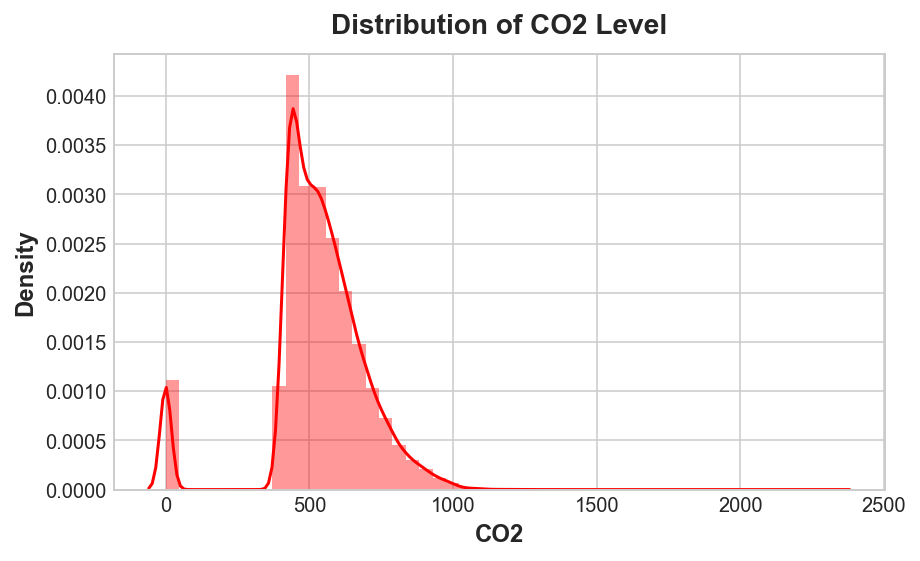

In [100]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(Chatelet['CO2'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of CO2 Level')

In [101]:
Chatelet['PM10'].replace('ND' , 0 , inplace=True)
Chatelet['PM10'].replace('<5' , 0 , inplace=True)
Chatelet['PM10'].replace('<2' , 0 , inplace=True)
Chatelet['PM10'].replace('>1000' , 0 , inplace=True)
Chatelet['PM10'] = Chatelet['PM10'].astype(str).astype(int)

Chatelet['TEMP'] = Chatelet['TEMP'].apply(lambda x : x.partition(",")[0])
Chatelet['TEMP'].replace('ND' , 0 , inplace=True)
Chatelet['TEMP'].replace('<5' , 0 , inplace=True)
Chatelet['TEMP'].replace('<2' , 0 , inplace=True)
Chatelet['TEMP'] = Chatelet['TEMP'].astype(str).astype(int)


Chatelet['HUMI'] = Chatelet['HUMI'].apply(lambda x : x.partition(",")[0])
Chatelet['HUMI'].replace('ND' , 0 , inplace=True)
Chatelet['HUMI'].replace('<5' , 0 , inplace=True)
Chatelet['HUMI'].replace('<2' , 0 , inplace=True)
Chatelet['HUMI'] = Chatelet['HUMI'].astype(str).astype(int)


Chatelet['NO'] = Chatelet['NO'].apply(lambda x : x.partition(",")[0])
Chatelet['NO'].replace('ND' , 0 , inplace=True)
Chatelet['NO'].replace('<5' , 0 , inplace=True)
Chatelet['NO'].replace('<2' , 0 , inplace=True)
Chatelet['NO'] = Chatelet['NO'].astype(str).astype(int)



# Chatelet['NO2'] = Chatelet['NO2'].apply(lambda x : x.partition(",")[0])
# Chatelet['NO2'].replace('ND' , 0 , inplace=True)
# Chatelet['NO2'].replace('<5' , 0 , inplace=True)
# Chatelet['NO2'].replace('<2' , 0 , inplace=True)
# Chatelet['NO2'] = Chatelet['NO2'].astype(str).astype(int)

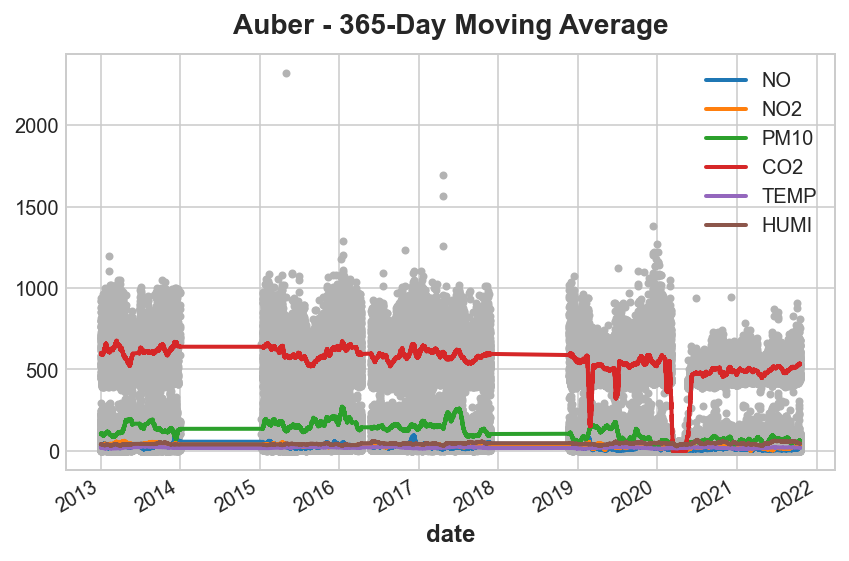

In [102]:
moving_average = Chatelet.rolling(
    window=365,       # 365-day window
    center=True,      # puts the average at the center of the window
    min_periods=200,  # choose about half the window size
).mean()              # compute the mean (could also do median, std, min, max, ...)

ax = Chatelet.plot(style=".", color="0.7")

ax.get_legend().remove()
moving_average.plot(
    ax=ax, linewidth=2, title="Auber - 365-Day Moving Average", legend=True,
);

In [143]:
Chatelet.index

DatetimeIndex(['2021-10-18', '2021-10-18', '2021-10-18', '2021-10-17',
               '2021-10-17', '2021-10-17', '2021-10-17', '2021-10-17',
               '2021-10-17', '2021-10-17',
               ...
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01'],
              dtype='datetime64[ns]', name='date', length=52166, freq=None)

In [103]:
Chatelet['Lag_CO2'] = Chatelet['CO2'].shift(1)
Chatelet.fillna(0, inplace=True)

XC = Chatelet.loc[:,['Lag_CO2','NO','NO2','TEMP','HUMI','PM10']]
YC = Chatelet['CO2']

X_trainC, X_testC, y_trainC, y_testC = train_test_split(XC, YC, test_size = 0.25, random_state = 0)

In [104]:
cols = X_trainC.columns

scaler = StandardScaler()

X_trainC = scaler.fit_transform(X_trainC)

X_testC = scaler.transform(X_testC)

X_trainC = pd.DataFrame(X_trainC, columns=[cols])

X_testC = pd.DataFrame(X_testC, columns=[cols])

In [105]:

model = LinearRegression()

model.fit(X_trainC, y_trainC)
model.score(X_trainC, y_trainC)

0.8736330628549263

In [106]:
y_pred1C = model.predict(X_testC)

In [108]:
mse_sk = mean_squared_error(y_pred1C, y_testC)
mse_sk

3675.0764390520335

In [109]:
R_square_skC = model.score(X_testC,y_testC)
R_square_skC

0.8747316907841884

In [117]:
y_predC = pd.Series(model.predict(X_trainC), index=X_trainC.index)

In [113]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 14))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_trainC, y_trainC)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cvC = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cvC.fit(X_trainC, y_trainC)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             return_train_score=True, scoring='r2', verbose=1)

In [114]:
cv_resultsC = pd.DataFrame(model_cvC.cv_results_)
cv_resultsC

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.021144,0.001467,0.002394,0.000489,1,{'n_features_to_select': 1},0.864199,0.858937,0.866968,0.878973,...,0.867493,0.006587,13,0.868445,0.869713,0.867727,0.864654,0.867369,0.867582,0.001669
1,0.016757,0.001162,0.002591,0.000488,2,{'n_features_to_select': 2},0.867440,0.862691,0.872268,0.882834,...,0.871614,0.006706,12,0.872793,0.873924,0.871560,0.868841,0.871408,0.871705,0.001698
2,0.017455,0.002406,0.002394,0.000488,3,{'n_features_to_select': 3},0.869021,0.864569,0.873579,0.883351,...,0.873023,0.006276,11,0.874176,0.875234,0.873011,0.870489,0.872751,0.873132,0.001591
3,0.013668,0.001536,0.002392,0.000489,4,{'n_features_to_select': 4},0.869459,0.865140,0.874204,0.883674,...,0.873489,0.006203,10,0.874651,0.875675,0.873439,0.870993,0.873241,0.873600,0.001573
4,0.010372,0.000798,0.002392,0.000489,5,{'n_features_to_select': 5},0.869541,0.865208,0.874169,0.883675,...,0.873513,0.006174,9,0.874671,0.875701,0.873489,0.871035,0.873283,0.873636,0.001565
5,0.008180,0.000977,0.002414,0.000516,6,{'n_features_to_select': 6},0.869554,0.865205,0.874175,0.883673,...,0.873516,0.006173,1,0.874673,0.875707,0.873493,0.871041,0.873288,0.873640,0.001565
6,0.008577,0.001492,0.002591,0.000488,7,{'n_features_to_select': 7},0.869554,0.865205,0.874175,0.883673,...,0.873516,0.006173,1,0.874673,0.875707,0.873493,0.871041,0.873288,0.873640,0.001565
7,0.014862,0.001741,0.004291,0.000594,8,{'n_features_to_select': 8},0.869554,0.865205,0.874175,0.883673,...,0.873516,0.006173,1,0.874673,0.875707,0.873493,0.871041,0.873288,0.873640,0.001565
8,0.010173,0.001324,0.002992,0.000891,9,{'n_features_to_select': 9},0.869554,0.865205,0.874175,0.883673,...,0.873516,0.006173,1,0.874673,0.875707,0.873493,0.871041,0.873288,0.873640,0.001565
9,0.009236,0.001970,0.002392,0.000487,10,{'n_features_to_select': 10},0.869554,0.865205,0.874175,0.883673,...,0.873516,0.006173,1,0.874673,0.875707,0.873493,0.871041,0.873288,0.873640,0.001565


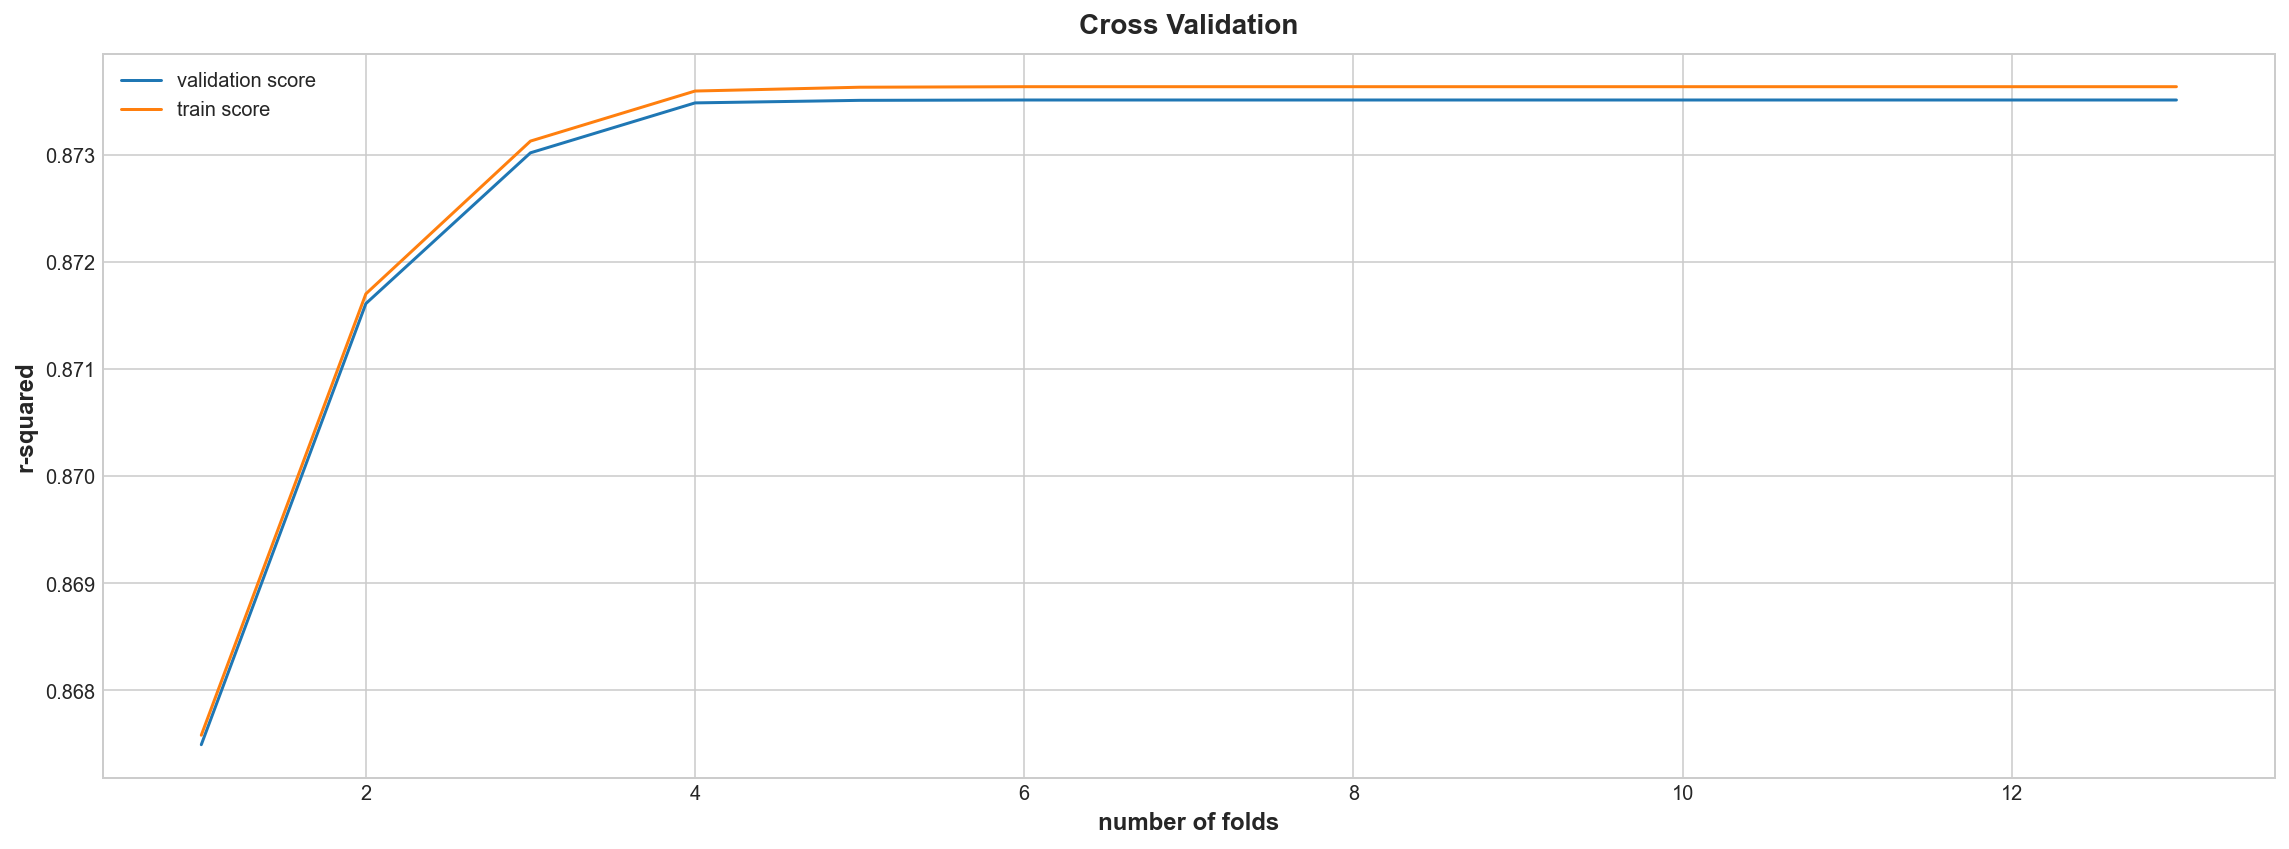

In [115]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_resultsC["param_n_features_to_select"], cv_resultsC["mean_test_score"])
plt.plot(cv_resultsC["param_n_features_to_select"], cv_resultsC["mean_train_score"])
plt.xlabel('number of folds')
plt.ylabel('r-squared')
plt.title("Cross Validation")
plt.legend(['validation score', 'train score'], loc='upper left')

Text(0.5, 37.400000000000006, 'Year')

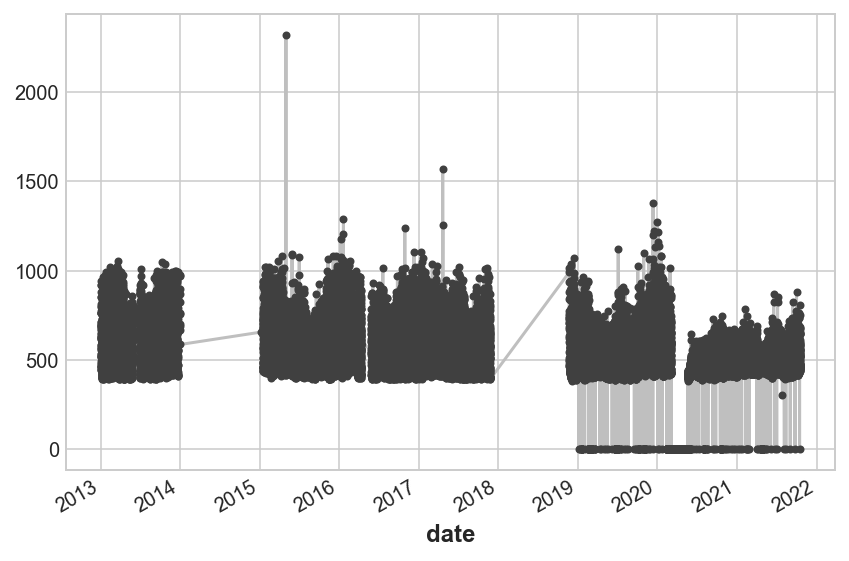

In [118]:
x = y_trainC.plot(**plot_params)
ax = y_predC.plot(ax=ax, linewidth=20)
ax.set_title('CO2 Time Plot of Chatelet');
ax.set_ylabel('CO2 Level')
ax.set_xlabel('Year')


<ipython-input-119-c5ad84004544>:1: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version
  plot_periodogram(Chatelet.CO2);


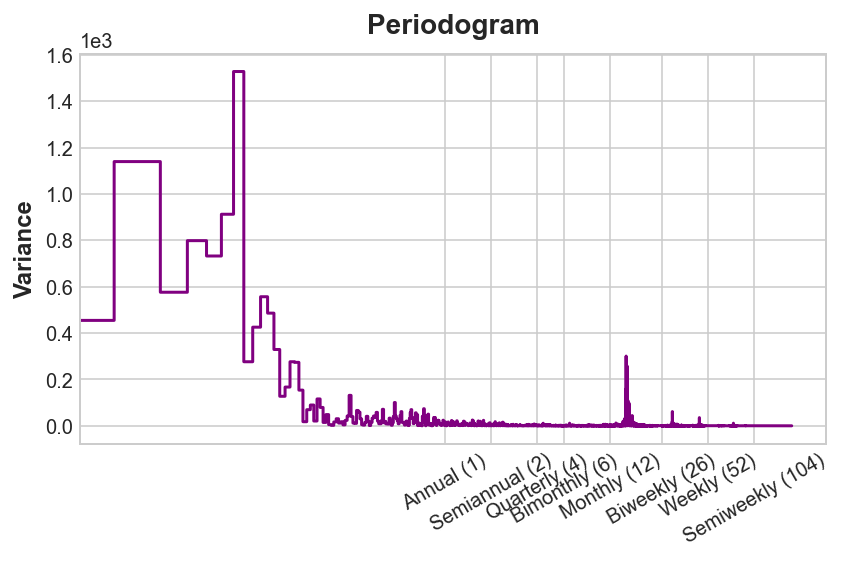

In [119]:
plot_periodogram(Chatelet.CO2);

Roosvelt Dataset

In [125]:
Fr_roosevelt.dtypes

NO       object
NO2      object
PM10     object
CO2       int32
TEMP     object
HUMI     object
heure    object
dtype: object

C:\Users\Ihsaan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of CO2 Level')

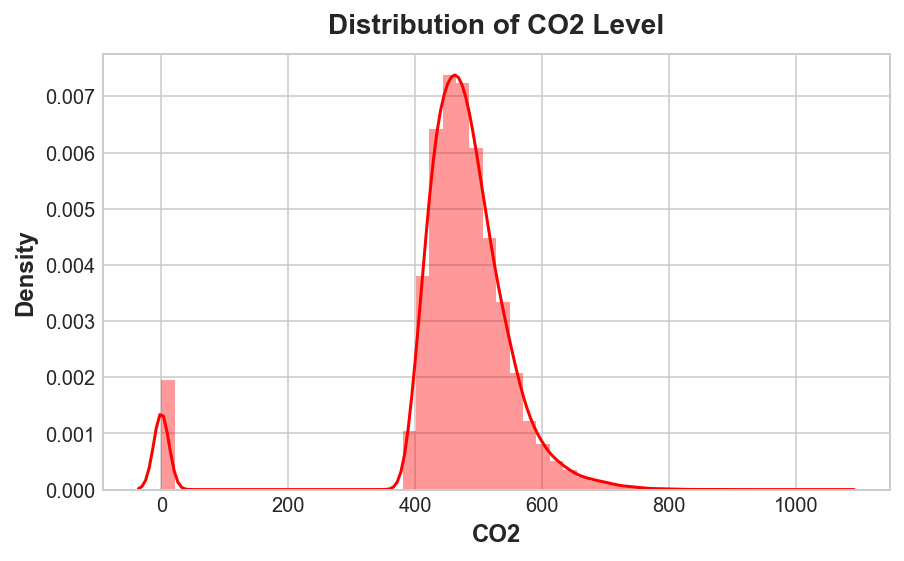

In [126]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(Fr_roosevelt['CO2'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of CO2 Level')

In [127]:
Fr_roosevelt['PM10'].replace('ND' , 0 , inplace=True)
Fr_roosevelt['PM10'].replace('<5' , 0 , inplace=True)
Fr_roosevelt['PM10'].replace('<2' , 0 , inplace=True)
Fr_roosevelt['PM10'].replace('>1000' , 0 , inplace=True)
Fr_roosevelt['PM10'] = Fr_roosevelt['PM10'].astype(str).astype(int)

Fr_roosevelt['TEMP'] = Fr_roosevelt['TEMP'].apply(lambda x : x.partition(",")[0])
Fr_roosevelt['TEMP'].replace('ND' , 0 , inplace=True)
Fr_roosevelt['TEMP'].replace('<5' , 0 , inplace=True)
Fr_roosevelt['TEMP'].replace('<2' , 0 , inplace=True)
Fr_roosevelt['TEMP'] = Fr_roosevelt['TEMP'].astype(str).astype(int)

Fr_roosevelt['HUMI'] = Fr_roosevelt['HUMI'].apply(lambda x : x.partition(",")[0])
Fr_roosevelt['HUMI'].replace('ND' , 0 , inplace=True)
Fr_roosevelt['HUMI'].replace('<5' , 0 , inplace=True)
Fr_roosevelt['HUMI'].replace('<2' , 0 , inplace=True)
Fr_roosevelt['HUMI'] = Fr_roosevelt['HUMI'].astype(str).astype(int)

Fr_roosevelt['NO'] = Fr_roosevelt['NO'].apply(lambda x : x.partition(",")[0])
Fr_roosevelt['NO'].replace('ND' , 0 , inplace=True)
Fr_roosevelt['NO'].replace('<5' , 0 , inplace=True)
Fr_roosevelt['NO'].replace('<2' , 0 , inplace=True)
Fr_roosevelt['NO'] = Fr_roosevelt['NO'].astype(str).astype(int)

Fr_roosevelt['NO2'] = Fr_roosevelt['NO2'].apply(lambda x : x.partition(",")[0])
Fr_roosevelt['NO2'].replace('ND' , 0 , inplace=True)
Fr_roosevelt['NO2'].replace('<5' , 0 , inplace=True)
Fr_roosevelt['NO2'].replace('<2' , 0 , inplace=True)
Fr_roosevelt['NO2'] = Fr_roosevelt['NO2'].astype(str).astype(int)

In [142]:
Fr_roosevelt.index

DatetimeIndex(['2021-10-18', '2021-10-18', '2021-10-18', '2021-10-17',
               '2021-10-17', '2021-10-17', '2021-10-17', '2021-10-17',
               '2021-10-17', '2021-10-17',
               ...
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01'],
              dtype='datetime64[ns]', name='date', length=67424, freq=None)

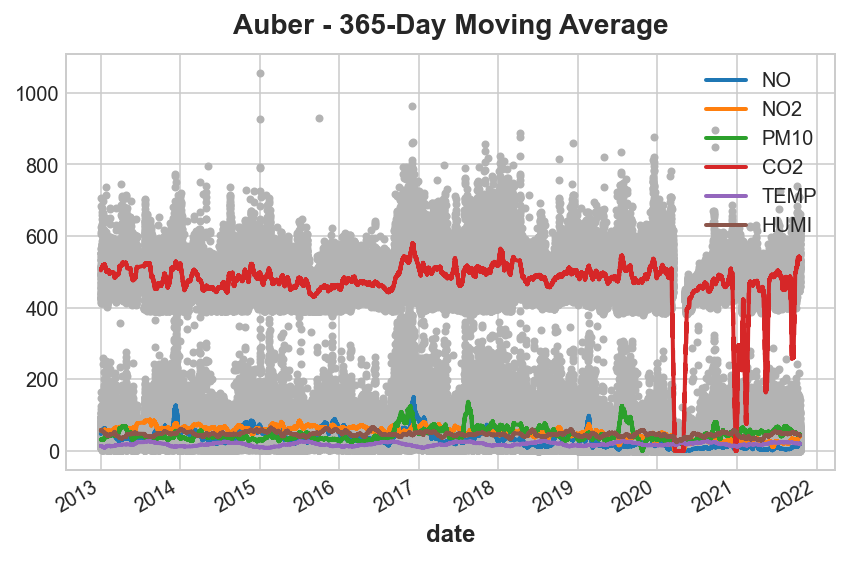

In [128]:
moving_average = Fr_roosevelt.rolling(
    window=365,       # 365-day window
    center=True,      # puts the average at the center of the window
    min_periods=200,  # choose about half the window size
).mean()              # compute the mean (could also do median, std, min, max, ...)

ax = Fr_roosevelt.plot(style=".", color="0.7")

ax.get_legend().remove()
moving_average.plot(
    ax=ax, linewidth=2, title="Auber - 365-Day Moving Average", legend=True,
);

In [129]:
Fr_roosevelt['Lag_CO2'] = Fr_roosevelt['CO2'].shift(1)
Fr_roosevelt.fillna(0, inplace=True)

XR = Fr_roosevelt.loc[:,['Lag_CO2','NO','NO2','TEMP','HUMI','PM10']]
YR = Fr_roosevelt['CO2']

X_trainR, X_testR, y_trainR, y_testR = train_test_split(XR, YR, test_size = 0.25, random_state = 0)

In [130]:
cols = X_trainR.columns

scaler = StandardScaler()

X_trainR = scaler.fit_transform(X_trainR)

X_testR = scaler.transform(X_testR)

X_trainR = pd.DataFrame(X_trainR, columns=[cols])

X_testR = pd.DataFrame(X_testR, columns=[cols])

In [131]:
model = LinearRegression()

model.fit(X_trainR, y_trainR)
model.score(X_trainR, y_trainR)

0.9203163255313676

In [132]:
y_pred1R = model.predict(X_testR)

In [133]:
mse_skR = mean_squared_error(y_pred1R, y_testR)
mse_skR

945.4470613401553

In [134]:
R_square_skR = model.score(X_testR,y_testR)
R_square_skR

0.9231966220886739

In [135]:
y_predR = pd.Series(model.predict(X_trainR), index=X_trainR.index)


In [136]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 14))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_trainR, y_trainR)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cvR = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cvR.fit(X_trainR, y_trainR)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             return_train_score=True, scoring='r2', verbose=1)

In [137]:
cv_resultsR = pd.DataFrame(model_cvR.cv_results_)
cv_resultsR

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.025332,0.003254,0.002592,4.882479e-04,1,{'n_features_to_select': 1},0.911241,0.922155,0.919983,0.913398,...,0.913729,0.007171,13,0.914490,0.911660,0.912321,0.913949,0.916766,0.913837,0.001792
1,0.022142,0.003961,0.002591,4.890454e-04,2,{'n_features_to_select': 2},0.916926,0.925784,0.925161,0.919786,...,0.919015,0.006680,12,0.919683,0.917381,0.917641,0.918967,0.921997,0.919134,0.001663
2,0.019052,0.001354,0.002193,3.994713e-04,3,{'n_features_to_select': 3},0.918099,0.926732,0.926073,0.920593,...,0.920080,0.006469,11,0.920731,0.918485,0.918755,0.920104,0.922964,0.920208,0.001610
3,0.017056,0.001112,0.001993,6.031566e-07,4,{'n_features_to_select': 4},0.918129,0.926706,0.926195,0.920709,...,0.920155,0.006441,10,0.920822,0.918589,0.918822,0.920174,0.923030,0.920287,0.001603
4,0.013766,0.001467,0.002191,3.981852e-04,5,{'n_features_to_select': 5},0.918132,0.926719,0.926224,0.920706,...,0.920165,0.006446,9,0.920853,0.918600,0.918848,0.920207,0.923060,0.920314,0.001608
5,0.009178,0.001161,0.002194,3.994466e-04,6,{'n_features_to_select': 6},0.918138,0.926768,0.926205,0.920715,...,0.920171,0.006458,1,0.920853,0.918607,0.918856,0.920209,0.923068,0.920319,0.001608
6,0.009027,0.000639,0.002194,3.989463e-04,7,{'n_features_to_select': 7},0.918138,0.926768,0.926205,0.920715,...,0.920171,0.006458,1,0.920853,0.918607,0.918856,0.920209,0.923068,0.920319,0.001608
7,0.009857,0.001189,0.002394,4.901248e-04,8,{'n_features_to_select': 8},0.918138,0.926768,0.926205,0.920715,...,0.920171,0.006458,1,0.920853,0.918607,0.918856,0.920209,0.923068,0.920319,0.001608
8,0.008807,0.000418,0.001995,3.319417e-06,9,{'n_features_to_select': 9},0.918138,0.926768,0.926205,0.920715,...,0.920171,0.006458,1,0.920853,0.918607,0.918856,0.920209,0.923068,0.920319,0.001608
9,0.010391,0.001362,0.002394,4.907230e-04,10,{'n_features_to_select': 10},0.918138,0.926768,0.926205,0.920715,...,0.920171,0.006458,1,0.920853,0.918607,0.918856,0.920209,0.923068,0.920319,0.001608


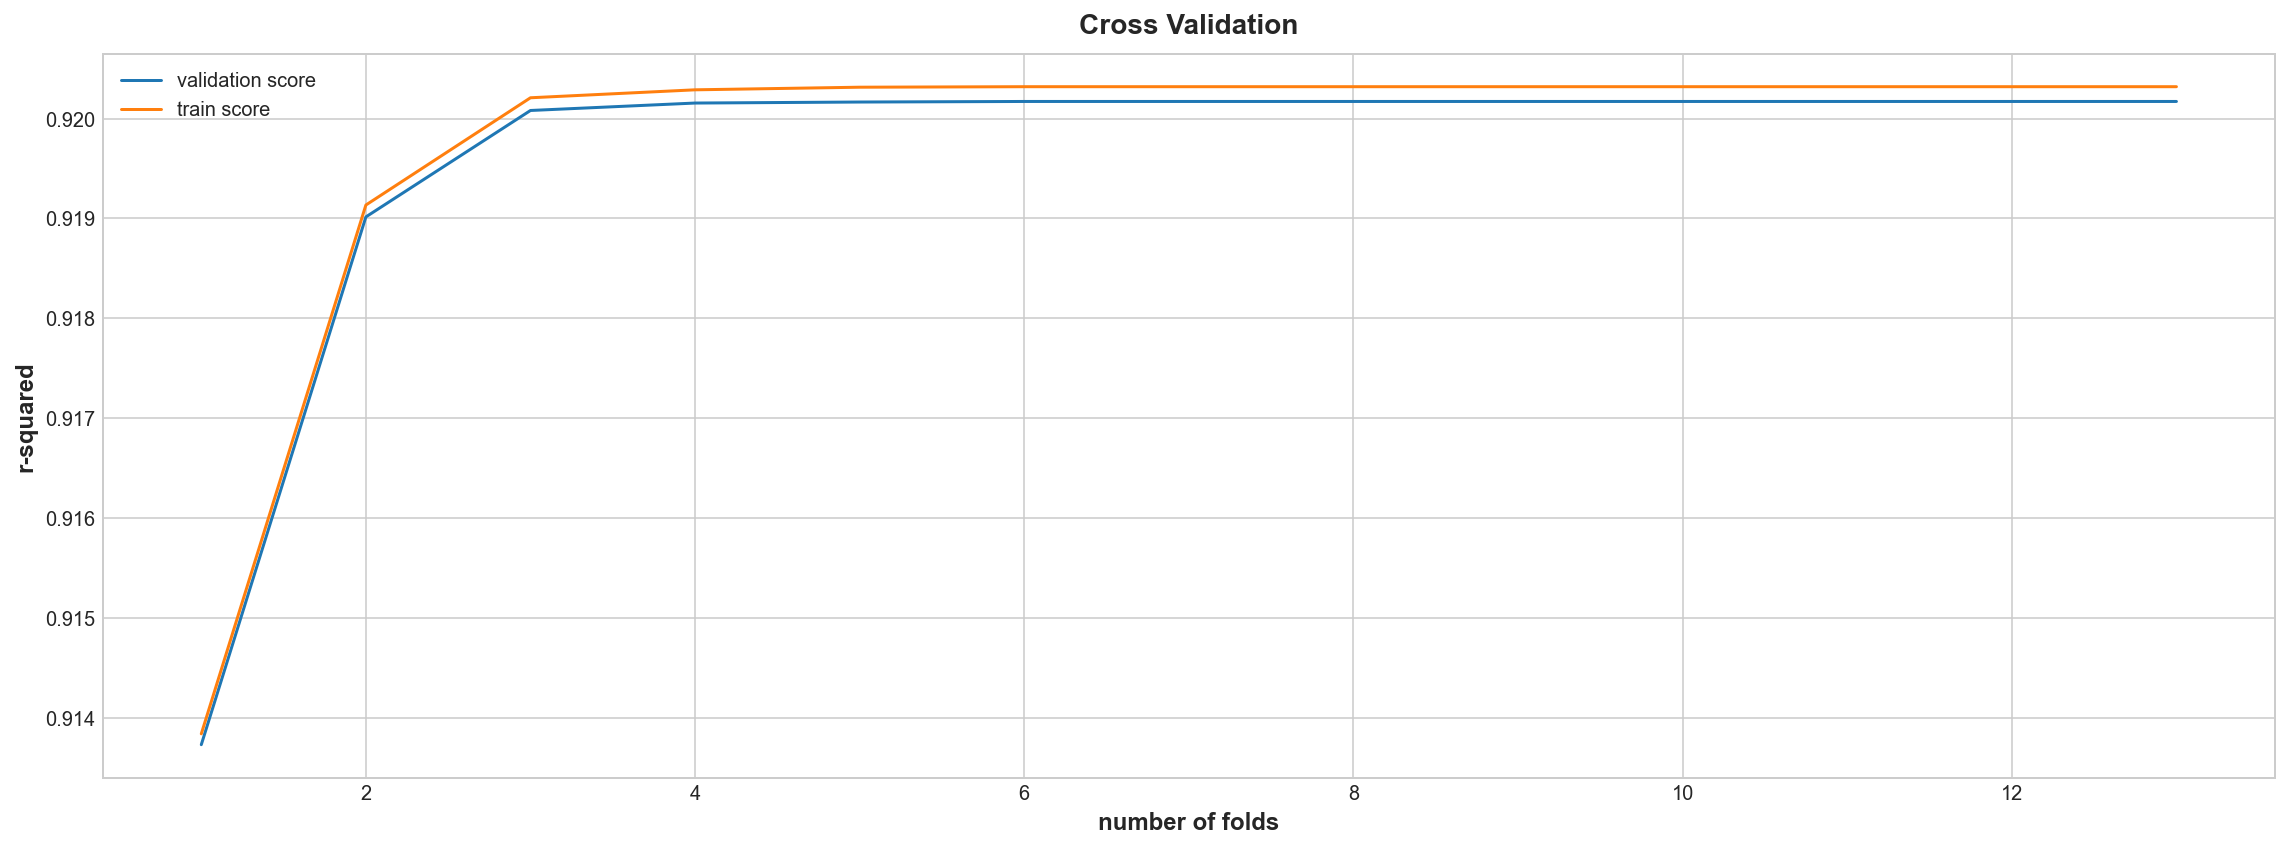

In [138]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_resultsR["param_n_features_to_select"], cv_resultsR["mean_test_score"])
plt.plot(cv_resultsR["param_n_features_to_select"], cv_resultsR["mean_train_score"])
plt.xlabel('number of folds')
plt.ylabel('r-squared')
plt.title("Cross Validation")
plt.legend(['validation score', 'train score'], loc='upper left')

Text(0.5, 37.400000000000006, 'Year')

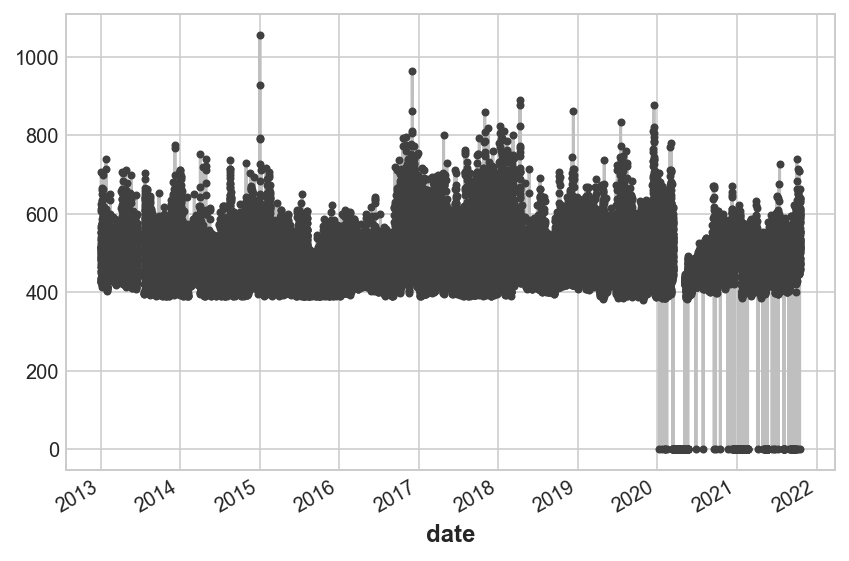

In [139]:
x = y_trainR.plot(**plot_params)
ax = y_predR.plot(ax=ax, linewidth=20)
ax.set_title('CO2 Time Plot of Franklin-Roosevelt');
ax.set_ylabel('CO2 Level')
ax.set_xlabel('Year')

<ipython-input-140-81403293b01d>:1: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version
  plot_periodogram(Fr_roosevelt.CO2);


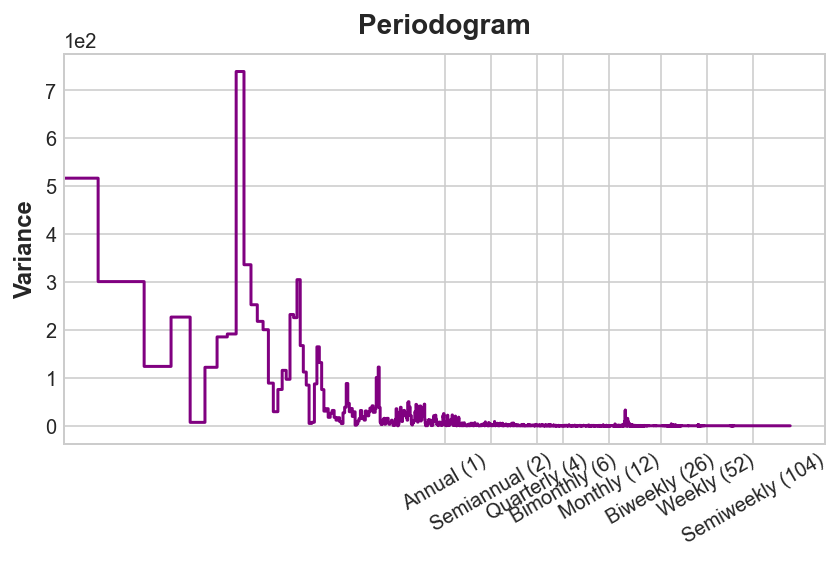

In [140]:
plot_periodogram(Fr_roosevelt.CO2);